# Pytorch Computer Vision Models

# Libraries
* `torchvision` - base computer vision library
* `torchvision.datasets` - get datasets and data loading for computer vision
* `torchvision.models` - get pretrained computer vision models that you can leverage for transfer learning
* `torchvision.transforms` - turn image data to tensors
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates python iterable over dataset

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## Getting dataset

The dataset we will use is fashion-MNIST (MNIST is like the "hello world" of computer vision datasets, many handwritten symbols, fashion version is greyscale fashion pics)

In [3]:
# Training data

train_data = datasets.FashionMNIST(
    root="data", # Where to download the dataset to
    train=True, # Training or testing data
    download=True, # Download?
    transform=ToTensor(), # How to transform data
    target_transform=None # How to transform labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # Where to download the dataset to
    train=False, # Training or testing data
    download=True, # Download?
    transform=ToTensor(), # How to transform data
    target_transform=None # How to transform labels/targets
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15865546.41it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 267338.03it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4922890.59it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8411483.05it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# Training example
image, label = train_data[0] # list of tuples
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets # Possible labels

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape, label
# image shape --> [colour_channels, height, width], image label = Ankle boot
# 1 colour_channel as greyscale so 1 colour channel (white/black), torch.datasets uses colour channels first

(torch.Size([1, 28, 28]), 9)

## Visualising data

Image shape: torch.Size([1, 28, 28])


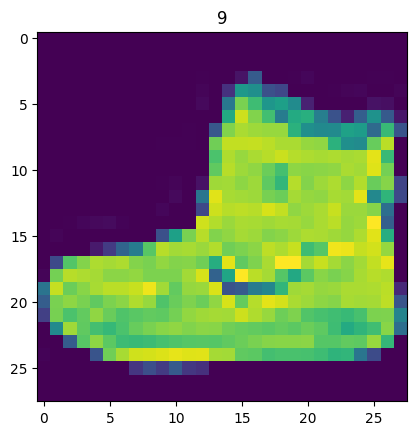

In [10]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# matplotlib expects just height and width or height, width, colour channel
plt.imshow(image.squeeze()); # Remove the singular dimension (the colour channel)
plt.title(label);

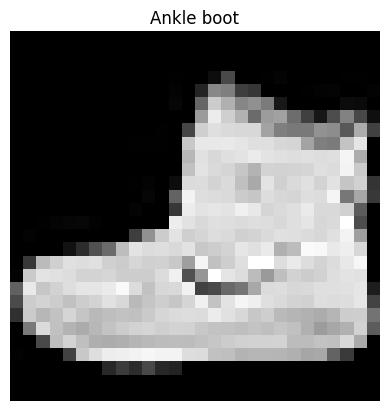

In [11]:
plt.imshow(image.squeeze(), cmap="gray") #cmap to change colour or use 'c'
plt.title(class_names[label]);
plt.axis(False);

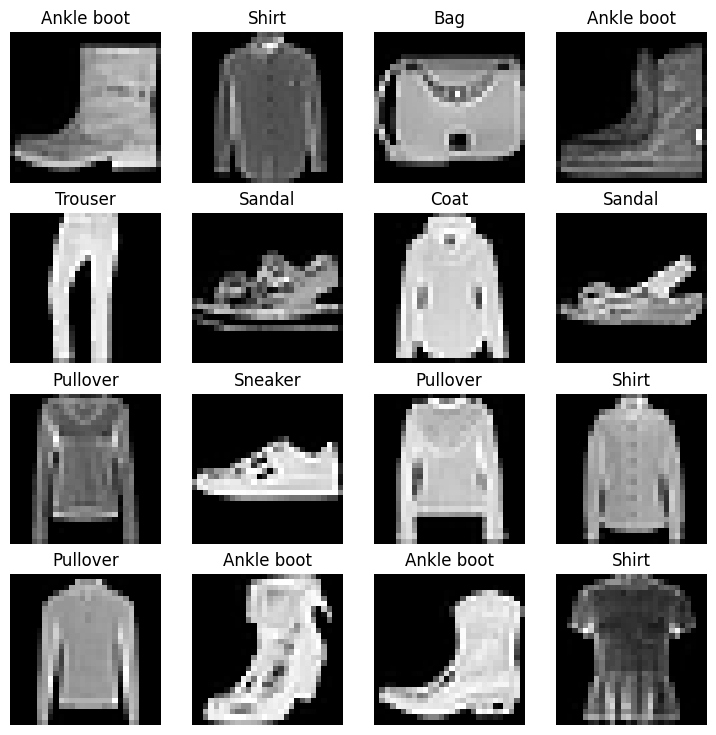

In [12]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item() #.item() returns the value in the tensor
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

# Prepare DataLoader

Now, data is in PyTorch Datasets.

DataLoader turns dataset into Python iterable.

We want to turn data into batches (or mini-batches).

Why?

1. More computationally efficient. hardware cannot handle so many images in one hit so we usually use batch numbers (common is 32)

2. Gives neural network more chances to update gradients per epoch

In [13]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

# Turn dataset into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # so model doesnt learn order

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False) # so its not being shuffled everytime we test

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cae857f7fa0>,
 <torch.utils.data.dataloader.DataLoader at 0x7cae857f7df0>)

In [14]:
# Check what we have created
print(train_dataloader, test_dataloader)
print(len(train_dataloader)) # batches of 32 --> 60000 / 32
print(len(test_dataloader)) # batches of 32

<torch.utils.data.dataloader.DataLoader object at 0x7cae857f7fa0> <torch.utils.data.dataloader.DataLoader object at 0x7cae857f7df0>
1875
313


In [15]:
# check what is in the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # turn dataloader into iterable and get the next batch
train_features_batch.shape, train_labels_batch.shape # Currently in colour channels first

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


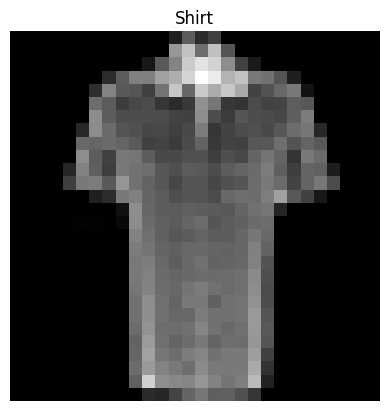

In [16]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_labels_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Model 0: Baseline computer vision model

Best practice to start with a baseline model - will be improved upon in subsequent models

In [17]:
# Create a flatten layer

flatten_model = nn.Flatten()

# Get single sample
x = train_features_batch[0]

# Flatten the sample's external dimensions
output = flatten_model(x) # forward pass

# Print out what happens
print(f"Shape before flattening: {x.shape}") # colour_channels, height, width
print(f"Shape after flattening: {output.shape}") # colour_channels, height * width

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [18]:
class FashionMNISTMODELV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networks like their inputs in vector form (ndim = 2)
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model_0 = FashionMNISTMODELV0(input_shape=784, # 28 * 28
                              hidden_units=10,
                              output_shape=len(class_names))

model_0.to("cpu")

model_0

FashionMNISTMODELV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28]) # test 1 image in the batch size of 32
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Loss, optimizer and evaluation metrics

* Loss function - multi-class data so `nn.CrossEntropyLoss()`

* Optimizer - `torch.optim.SGD()`, or can consider ADAM

* Evaluation metric - classification problem so use Accuracy as evaluation metric


In [22]:
# use helper functions if you want / torchmetrics

import requests
from pathlib import Path

if Path("helper_function.py").is_file():
  print("Already exists")
else:
  print("Downloading...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

Downloading...


In [23]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### Time the experiments

1. Model's performance (Accuracy etc)
2. How fast it runs

Sometimes one results in a tradeoff of the other but both are important

In [24]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None): # Defaults device to None, type is torch.device
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [25]:
# Testing timer function
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.881899999669258e-05

## Creating training loop using batches

1. Loop through epochs.
2. Loop through training batches, training steps, calculate train loss *per batch*
3. Loop through testing batches, testing steps, calculate test loss *per batch*
4. Print out
5. Time it all


In [26]:
# Import tqdm for a progress bar
# .auto will give best type of progress bar based on the environment
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 3 # keep small for faster training time

# Training and test loop
for epoch in tqdm(range(epochs)): # wrap iterator with tqdm
  print(f"Epoch: {epoch}\n-----")

  ### Training
  train_loss = 0

  # Loop to loop through all the batches
  for batch, (X, y) in enumerate(train_dataloader): # enumerate adds a counter --> batch, the features and labels to X and y respectively
    model_0.train()
    # Forward pass
    y_pred = model_0(X)

    # Loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the train loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step done every batch rather than every epoch
    optimizer.step()


    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Training loss per batch
  train_loss /= len(train_dataloader)     # similar to train_loss = train_loss / len(train_dataloader)


  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass
      test_pred = model_0(X_test)

      # Accumulative loss
      test_loss += loss_fn(test_pred, y_test)

      # Accuracy
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1)) # compare labels to labels, convert test pred logits to labels

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Accuracy per batch
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 32.226 seconds


## Make predictions

In [27]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dict containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # Accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # only works when model was created with a class
          "model_loss": loss.item(),  # get the value in the tensor
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [28]:
# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [29]:
## Model 1 (using non-linear and linear layers)

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [30]:
device

'cuda'

In [31]:
# Create model 1 on gpu
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [32]:
from helper_function import accuracy_fn

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


### Functionalising training and testing loops so can reuse for different models

training loop - train_step()
testing loop - test_step()

In [33]:
# Functionalise the training loop

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """Performs training with model trying to learn on data_loader """

  train_loss, train_acc = 0, 0

  model.train()

  # Loop to loop through all the batches
  for batch, (X, y) in enumerate(data_loader): # enumerate adds a counter --> batch, the features and labels to X and y respectively
    # Device agnostic data
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model(X)

    # Loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate the train loss

    # Accuracy (per batch)
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1)) # change logits to prediction labels

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step done every batch rather than every epoch
    optimizer.step()


  # Training loss and accuracy per batch
  train_loss /= len(data_loader)     # similar to train_loss = train_loss / len(train_dataloader)
  train_acc /= len(data_loader)

  # Print at end of training step
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%\n")

In [34]:
# Functionalise the testing loop

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  """Performs a testing loop step for model going over data_loader"""

  test_loss, test_acc = 0, 0

  # Put model in eval mode
  model.eval()

  with torch.inference_mode():
    for X, y in test_dataloader:
      # Device agnostic data again
      X, y = X.to(device), y.to(device)

      # Forward pass
      y_pred = model(X)

      # Accumulative loss
      test_loss += loss_fn(y_pred, y)

      # Accuracy
      test_acc += accuracy_fn(y, y_pred.argmax(dim=1)) # compare labels to labels, convert test pred logits to labels

    # Must be modified within the context manager
    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Accuracy per batch
    test_acc /= len(data_loader)

    # Print
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [35]:
# Replicate the training and testing loop using the functions now

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.09199 | Train acc: 61.34%

Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-----
Train loss: 0.78101 | Train acc: 71.93%

Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-----
Train loss: 0.67027 | Train acc: 75.94%

Test loss: 0.68500 | Test acc: 75.02%

Train time on cuda: 31.768 seconds


In [36]:
model_0_results

{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [37]:
total_train_time_model_0

32.22551179500002

### Sometimes the model trains faster on CPU than GPU
1. here the computer has to copy the data into the gpu which may offset the higher compute capability (overhead)

2. also the model_1 has more layers than model_0

In [38]:
# This time tackle the device agnostic code

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dict containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # data to be device agnostic
      X, y = X.to(device), y.to(device)

      # make predictions
      y_pred = model(X)

      # Accumulate loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # Per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # only works when model was created with a class
          "model_loss": loss.item(),  # get the value in the tensor
          "model_acc": acc}

In [39]:
# Get results dictionary again to compare between models
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_0_results, model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMNISTMODELV0',
  'model_loss': 0.47663894295692444,
  'model_acc': 83.42651757188499},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6850008964538574,
  'model_acc': 75.01996805111821})

## Model 2: Building a Convolutional Neural Network (CNN)

* CNNs are well-known for capabilities in finding patterns in visual data

* Also known as ConvNets

In [90]:
# Create a convolutional neural network

class FashionMNISTModelV2(nn.Module):
  """ Model architecture that replicates the TinyVGG """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    # These 2 layers are feature extractors
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,   # 2d for 2 dimensional data (height and width)
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves so hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,  # from prev block
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

  # This layer takes the features and classify into classes
    self.classifier = nn.Sequential(
        nn.Flatten(),  # output of the conv layers is to be flattened to 2d feature vector
        nn.Linear(in_features=hidden_units*7*7, # theres a trick to calculating this
                  out_features=output_shape) # no. of classes
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape) # print out to figure out the shapes to later calculate classifier in_features
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x



In [91]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # number of colour channels
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)



In [92]:
image.shape

torch.Size([1, 28, 28])

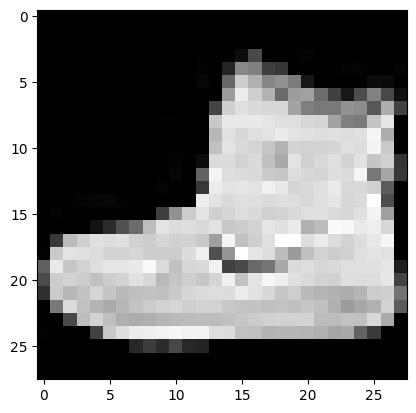

In [93]:
plt.imshow(image.squeeze(), cmap="gray")

In [94]:
rand_image_tensor = torch.randn(1, 28, 28)
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [95]:
# Forward pass
# in 2.0 pytorch no need to unsqueeze
model_2(rand_image_tensor.unsqueeze(dim=1).to(device)) # compressed twice by half due to maxpool2d

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Stepping through `nn.Conv2d()`

In [96]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(32, 3, 64, 64)

test_image = images[0]

In [97]:
images.shape, test_image.shape

(torch.Size([32, 3, 64, 64]), torch.Size([3, 64, 64]))

In [98]:
test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [123]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,   # same as (3, 3)
                       stride=1,
                       padding=1)

# Pass data through the conv2d layer
conv_output = conv_layer(test_image.unsqueeze(dim=0)) # to mimic the batch dimensions as well (4 dimensions in inputs --> batch size, colour, height, width)
conv_output.shape

torch.Size([1, 10, 64, 64])

## Stepping through `nn.MaxPool2d()`

In [100]:
# original shape of test image
test_image.shape


torch.Size([3, 64, 64])

In [101]:
# create maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after conv layer: {test_image_through_conv.shape}")

# pass data through maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after conv and max layer: {test_image_through_conv_and_max_pool.shape}")

Shape after conv layer: torch.Size([10, 64, 64])
Shape after conv and max layer: torch.Size([10, 32, 32])


In [102]:
torch.manual_seed(42)

# Create random tensor as similar ndim as test image
random_tensor = torch.randn(1, 1, 2, 2)
print(f"Random tensor: {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass it through
max_pool_tensor = max_pool_layer(random_tensor)

print(f"\nMax pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


## Loss function and optimizer for model_2

In [103]:
# Loss function
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

## Training and testing `model_2` using training and test functions

In [105]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Training and testing
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.58856 | Train acc: 78.62%

Test loss: 0.39694 | Test acc: 86.03%

Epoch: 1
----
Train loss: 0.36081 | Train acc: 86.92%

Test loss: 0.35342 | Test acc: 87.19%

Epoch: 2
----
Train loss: 0.32168 | Train acc: 88.35%

Test loss: 0.32229 | Test acc: 88.19%

Train time on cuda: 36.230 seconds


In [106]:
# Get model_2 results

model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [110]:
# Compare results and training time
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3222895860671997,
 'model_acc': 88.18889776357827}

In [108]:
model_0_results

{'model_name': 'FashionMNISTMODELV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [109]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [112]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTMODELV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.322290,88.188898


In [113]:
# Add training time (performance-speed tradeoff)

compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTMODELV0,0.476639,83.426518,32.225512
1,FashionMNISTModelV1,0.685001,75.019968,31.767792
2,FashionMNISTModelV2,0.322290,88.188898,36.230169


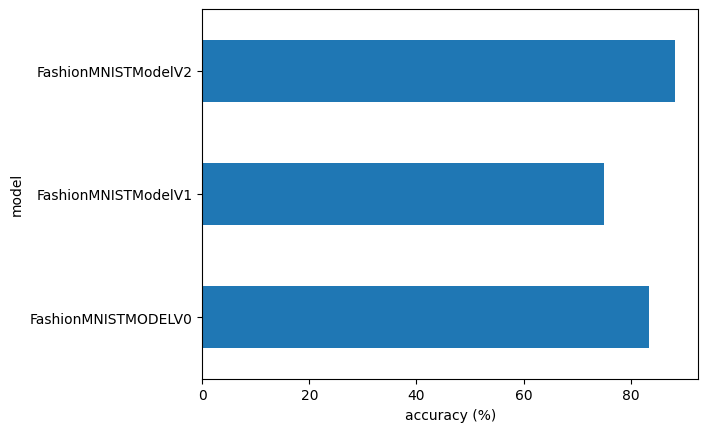

In [118]:
# Visualise model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## Make and evaluate random predictions with best model

In [121]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample (add batch dimension)
      sample = sample.unsqueeze(dim=0).to(device)

      # forward pass
      pred_logit = model(sample)

      # Get pred probability, softmax for multiclass classification to convert logits to pred probs
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [126]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [165]:
import random
# random.seed(42) # set seed
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):  # converts test_data to python iterable list and chooses 9 test data (img + label)
  test_samples.append(sample)
  test_labels.append(label)


# View first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

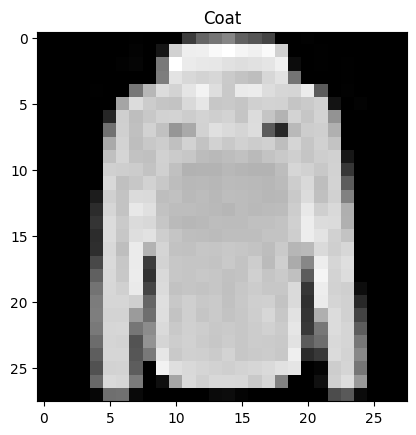

In [166]:
plt.imshow(test_samples[0].squeeze(), cmap="gray") # squeeze to remove batch dim
plt.title(class_names[test_labels[0]]);

In [167]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first 2 prediction probabilities
pred_probs[:2]

tensor([[1.4422e-04, 4.1075e-06, 2.1572e-01, 3.8279e-04, 7.7516e-01, 3.8159e-07,
         8.5728e-03, 4.8265e-08, 2.2638e-05, 7.9363e-07],
        [2.9402e-03, 3.4067e-04, 2.0331e-01, 1.7913e-02, 1.0048e-02, 2.0208e-04,
         7.5819e-01, 1.0206e-05, 6.7197e-03, 3.2102e-04]])

In [168]:
# Convert pred probs into labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 6, 9, 0, 6, 1, 9, 0, 7])

In [169]:
test_labels

[4, 6, 9, 6, 2, 1, 9, 0, 7]

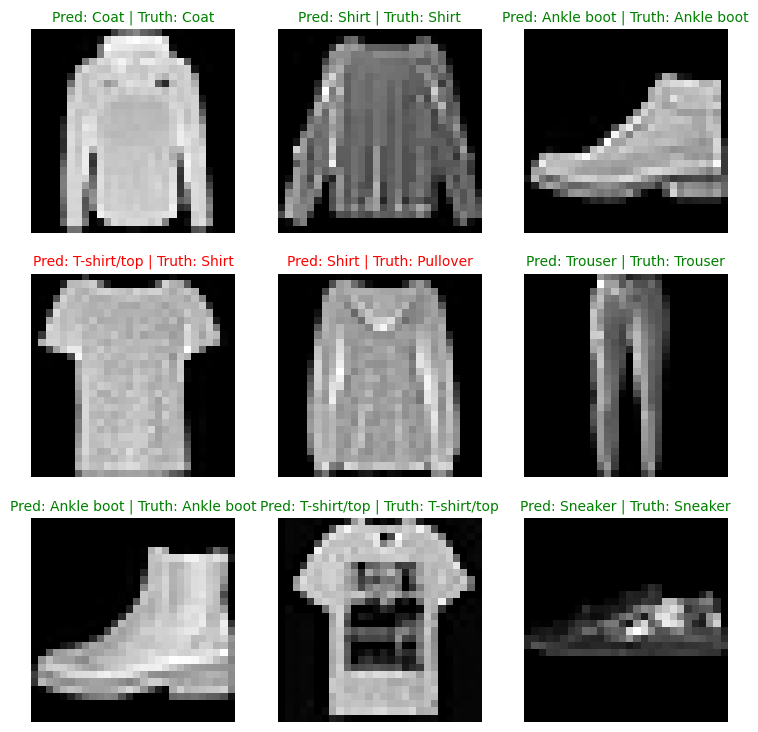

In [170]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find prediction label text form
  pred_label = class_names[pred_classes[i]]


  # Truth label in text form
  truth_label = class_names[test_labels[i]]

  # Create title for plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Change colour of title text if wrong
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green if correct

  else:
    plt.title(title_text, fontsize=10, c="r") # red if wrong

  plt.axis("Off");  # Or plt.axis(False)

## Confusion matrix for further prediction evaluation

A confusion matrix is a good way of evaluating classification models visually

1. Make predictions with trained model on test dataset
2. Make confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [185]:
import mlxtend

mlxtend.__version__# need 0.19.0+

'0.22.0'

In [186]:
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)

    # forward pass
    y_logit = model_2(X)

    # Convert logits to prediction labels
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

    # Put on CPU for evaluation (e.g. for matplotlib)
    y_preds.append(y_pred.cpu())

# concatenate list of preds into a tensor
y_pred_tensor = torch.cat(y_preds) # turns list of tensors into a single tensor
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [187]:
len(y_pred_tensor)

10000

In [188]:
!pip install torchmetrics

In [191]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [192]:
test_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

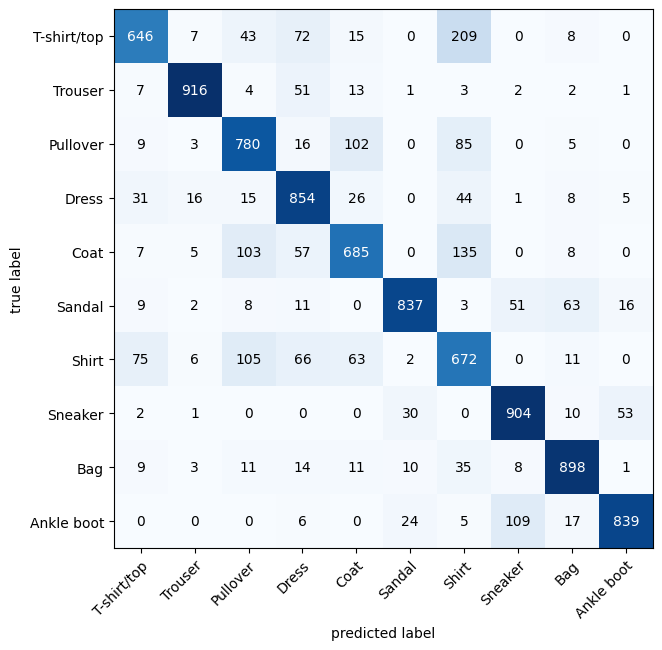

In [197]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare preds to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# Plot the matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),   # matplotlib likes working with numpy arrays
    class_names=class_names,
    figsize=(10, 7)
)

## Save and load best model

In [199]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/03_pytorch_computer_vision_model_2.pth


In [203]:
# Loading back

# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [204]:
loaded_model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.3397,  0.2678, -0.4382],
                        [ 0.1420,  0.1937, -0.0246],
                        [-0.3517,  0.0635,  0.4386]]],
              
              
                      [[[-0.2569,  0.3772, -0.1272],
                        [ 0.2179,  0.3942,  0.1114],
                        [-0.0815,  0.3719,  0.0432]]],
              
              
                      [[[-0.4543, -0.1262, -0.0167],
                        [-0.5627, -0.6376,  0.1310],
                        [-0.6830, -0.5673, -0.1071]]],
              
              
                      [[[-0.8820, -1.0396, -0.7189],
                        [ 0.2523, -0.6530,  0.1641],
                        [ 0.4330, -0.0279,  0.4451]]],
              
              
                      [[[-0.1053,  0.4389, -0.1486],
                        [-0.3043,  0.4838, -0.2613],
                        [-0.0611,  0.4044,  0.0721]]],
              
              
      

In [205]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3222895860671997,
 'model_acc': 88.18889776357827}

In [206]:
# evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3222895860671997,
 'model_acc': 88.18889776357827}

In [210]:
# check if model results are close
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02) # tolerance

tensor(True)